In [48]:
%matplotlib inline

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
import pymatgen as mg
from pymatgen import Lattice, Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

# Convert CIF to JCPDS

## Input parameters

`cif` should exist in the `./cif` folder.  
`jcpds` will be created in the `./jcpds` folder.

In [51]:
%ls ./cif

Fe25O32_80GPa.cif           MgSiO3_bm.cif
Fe2S.cif                    Ni2S.cif
Fe4O5_10GPa.cif             Ni3S2.cif
Fe5O6_11GPa.cif             eta-Fe2O3_64GPa.cif
Fe5O7_41GPa.cif             eta-Fe2O3_74GPa.cif
FeS2_mp-1522_primitive.cif  iota-Fe2O3_40.7GPa.cif
HP-Fe3O4_44GPa.cif          theta-Fe2O3_ 74GPa.cif


In [52]:
cif_name = 'FeS2_mp-1522_primitive'

Make changes for your phase.

In [53]:
k0 = 200. # 200.
k0p = 4.00 # 4.
alpha = 3.16e-5 # 1.e-5

In [54]:
fn_cif = "./cif/"+cif_name+'.cif'
fn_jcpds = './jcpds/'+cif_name+'.jcpds'
comments_jcpds = cif_name

<font color='red'> __(NOTE)__ Make sure _symmetry_space_group_name_H-M is not `P1` below. </font>

In [79]:
!head {fn_cif}

# generated using pymatgen
data_FeS2
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   3.38461958
_cell_length_b   4.44069755
_cell_length_c   5.40650212
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   1


Parameters for the equation of state of bridgmanite.

<font color='red'> __(NOTE)__ Make sure pymatgen version is later than 2019.4.11. </font>

In [56]:
print(mg.__version__)

2019.7.30


In [57]:
wl_xray = 0.3344
xrange = (0,40)

In [85]:
verbose = True

In [86]:
import sys
sys.path.append('../../peakpo/')
sys.path.append('../local_modules/')
import ds_jcpds
import quick_plots as quick

## Read CIF

The `cif` file below was downloaded from American mineralogist crystal structure database.

In [87]:
material = mg.Structure.from_file(fn_cif)

## Get some parameters in CIF

In [88]:
if verbose:
    print(material )

Full Formula (Fe2 S4)
Reduced Formula: FeS2
abc   :   3.384620   4.440698   5.406502
angles:  90.000000  90.000000  90.000000
Sites (6)
  #  SP      a         b         c
---  ----  ---  --------  --------
  0  Fe    0    0         0
  1  Fe    0.5  0.5       0.5
  2  S     0.5  0.293782  0.875173
  3  S     0    0.206218  0.375173
  4  S     0.5  0.706218  0.124827
  5  S     0    0.793782  0.624827


In [89]:
lattice = material.lattice
if verbose:
    print('Lattice parameters = ', lattice.a, lattice.b, lattice.c, \
          lattice.alpha, lattice.beta, lattice.gamma)
crystal_system = SpacegroupAnalyzer(material).get_crystal_system()
if verbose:
    print(crystal_system)

Lattice parameters =  3.38461958 4.44069755 5.40650212 90.0 90.0 90.0
orthorhombic


In [91]:
SpacegroupAnalyzer(material).get_space_group_symbol()

'Pnnm'

In [104]:
from pymatgen.io.cif import CifParser
parser = CifParser(fn_cif)
structure = parser.get_structures()
structure

[Structure Summary
 Lattice
     abc : 3.38461958 4.44069755 5.40650212
  angles : 90.0 90.0 90.0
  volume : 81.26011546452555
       A : 3.38461958 0.0 2.0724817674892294e-16
       B : -2.719143020294497e-16 4.44069755 2.719143020294497e-16
       C : 0.0 0.0 5.40650212
 PeriodicSite: Fe (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
 PeriodicSite: Fe (1.6923, 2.2203, 2.7033) [0.5000, 0.5000, 0.5000]
 PeriodicSite: S (1.6923, 1.3046, 4.7316) [0.5000, 0.2938, 0.8752]
 PeriodicSite: S (-0.0000, 0.9158, 2.0284) [0.0000, 0.2062, 0.3752]
 PeriodicSite: S (1.6923, 3.1361, 0.6749) [0.5000, 0.7062, 0.1248]
 PeriodicSite: S (-0.0000, 3.5249, 3.3781) [0.0000, 0.7938, 0.6248]]

In [115]:
with open(fn_cif, 'r') as f:
    cif_data = f.readlines()

In [116]:
cif_data

['# generated using pymatgen\n',
 'data_FeS2\n',
 "_symmetry_space_group_name_H-M   'P 1'\n",
 '_cell_length_a   3.38461958\n',
 '_cell_length_b   4.44069755\n',
 '_cell_length_c   5.40650212\n',
 '_cell_angle_alpha   90.00000000\n',
 '_cell_angle_beta   90.00000000\n',
 '_cell_angle_gamma   90.00000000\n',
 '_symmetry_Int_Tables_number   1\n',
 '_chemical_formula_structural   FeS2\n',
 "_chemical_formula_sum   'Fe2 S4'\n",
 '_cell_volume   81.26011547\n',
 '_cell_formula_units_Z   2\n',
 'loop_\n',
 ' _symmetry_equiv_pos_site_id\n',
 ' _symmetry_equiv_pos_as_xyz\n',
 "  1  'x, y, z'\n",
 'loop_\n',
 ' _atom_site_type_symbol\n',
 ' _atom_site_label\n',
 ' _atom_site_symmetry_multiplicity\n',
 ' _atom_site_fract_x\n',
 ' _atom_site_fract_y\n',
 ' _atom_site_fract_z\n',
 ' _atom_site_occupancy\n',
 '  Fe  Fe0  1  0.000000  0.000000  0.000000  1\n',
 '  Fe  Fe1  1  0.500000  0.500000  0.500000  1\n',
 '  S  S2  1  0.500000  0.293782  0.875173  1\n',
 '  S  S3  1  0.000000  0.206218  0.375

In [128]:
for line in cif_data:
    if '_symmetry_space_group_name_H-M' in line:
        a = line.replace('_symmetry_space_group_name_H-M', '')
        if 'P 1' in a:
            print('Got it')

Got it


## Get diffraction pattern

In [64]:
c = XRDCalculator(wavelength=wl_xray)

In [65]:
pattern = c.get_pattern(material, two_theta_range = xrange)

## Extract twotheta, d-sp, int, hkl

In [66]:
h = []; k = []; l = []
for i in range(pattern.hkls.__len__()):
    h.append(pattern.hkls[i][0]['hkl'][0])
    k.append(pattern.hkls[i][0]['hkl'][1])
    l.append(pattern.hkls[i][0]['hkl'][2])

In [67]:
d_lines = [pattern.x, pattern.d_hkls, pattern.y, h, k, l ]
diff_lines = np.transpose(np.asarray(d_lines))

## Table output

We can make a nice looking table using the `pandas` package.  `pandas` is more than looking-good table producer.  It is a powerful statistics package popular in data science.

In [68]:
if verbose:
    table = pd.DataFrame(data = diff_lines,    # values
        columns=['Two Theta', 'd-spacing', 'intensity', 'h', 'k', 'l'])  
    # 1st row as the column names
    table.head()

## Plot peak positions generated from pymatgen

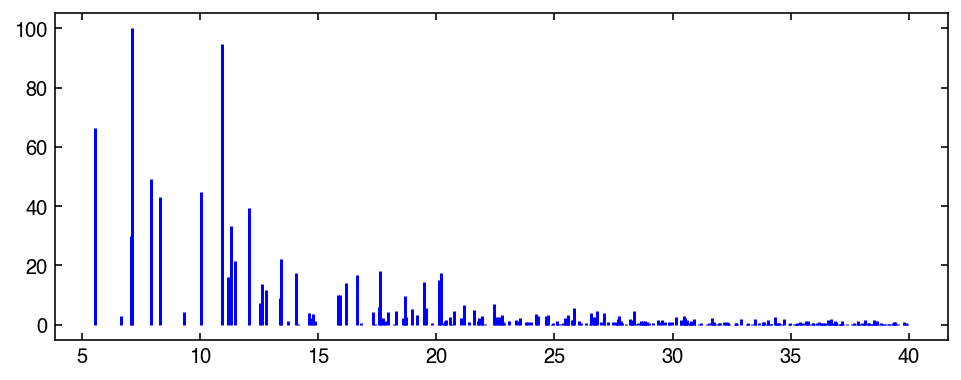

In [69]:
f, ax = plt.subplots(figsize=(8,3))
ax.vlines(diff_lines[:,0], 0., diff_lines[:,2], color='b');

## Convert to JCPDS

Setup an `jcpds` object from a `cif` file

In [70]:
material_jcpds = ds_jcpds.JCPDS()
material_jcpds.set_from_cif(fn_cif, k0, k0p, \
                      thermal_expansion=alpha, 
                        two_theta_range=xrange)

True

Calculate diffraction pattern at a pressure.

In [71]:
material_jcpds.cal_dsp(pressure = 100., temperature = 1000.)
dl = material_jcpds.get_DiffractionLines()
tth, inten = material_jcpds.get_tthVSint(wl_xray)

(7.5, 9)

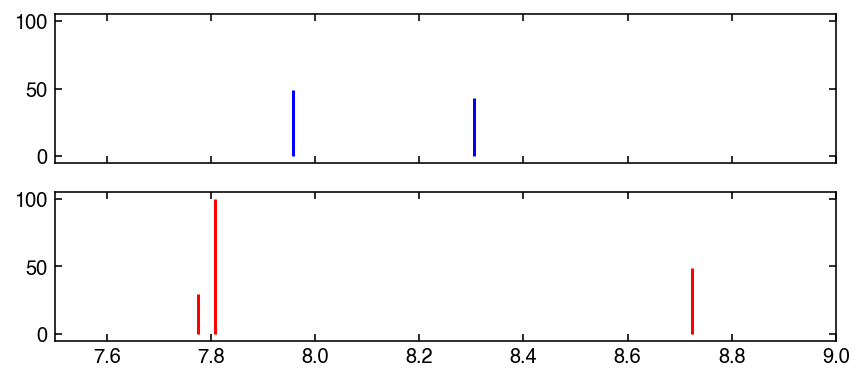

In [72]:
f, ax = plt.subplots(2, 1, figsize=(7,3), sharex=True)
ax[0].vlines(diff_lines[:,0], 0., diff_lines[:,2], color='b')
ax[1].vlines(tth, 0., inten, color = 'r')
ax[0].set_xlim(7.5,9)

## Save to a JCPDS file

In [73]:
material_jcpds.write_to_file(fn_jcpds, comments=comments_jcpds)

In [74]:
!head {fn_jcpds}

4
FeS2_mp-1522_primitive
4 200.00 4.00 
3.38462 4.44070 5.40650 
3.1600e-05 
d-spacing    I/I0     h   k   l 
3.431555 66.27 0.0 1.0 1.0 
2.868826 2.80 1.0 0.0 1.0 
2.703251 29.88 0.0 0.0 2.0 
2.691874 100.00 1.0 1.0 0.0 


# Read back the written JCPDS for test

In [75]:
material_test = ds_jcpds.JCPDS(filename = fn_jcpds)

In [76]:
material_test.cal_dsp(pressure = 100.)
material_test.get_DiffractionLines()
tth, inten = material_test.get_tthVSint(wl_xray)

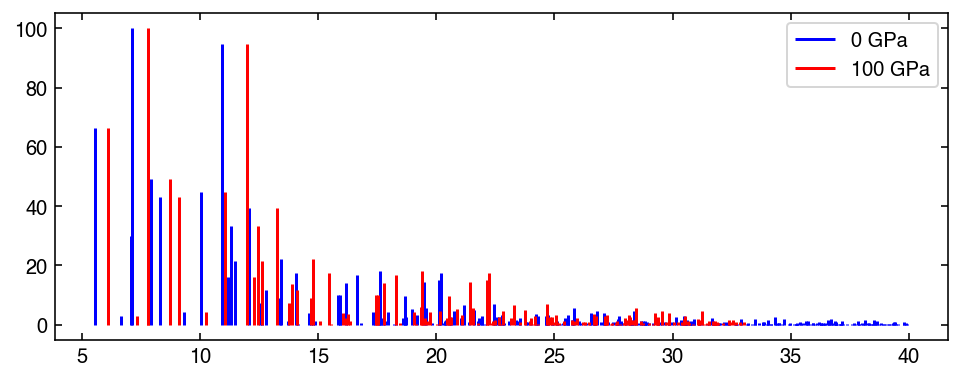

In [77]:
f = plt.figure(figsize=(8,3))
plt.vlines(diff_lines[:,0], 0., diff_lines[:,2], color='b', label='0 GPa')
plt.vlines(tth, 0., inten, color = 'r', label='100 GPa')
plt.legend();

# Check for possible errors in conversion

The most common error in converting `cif` to `jcpds` is incorrect symmetry conversion.  The cell below check the symmetry conversion.

In [78]:
if crystal_system != material_jcpds.symmetry:
    print('symmetry is different')
else:
    print('symmetry seems to be fine')

symmetry seems to be fine
